## Przykłady

## Przykłąd 13 - ogólny schemat pracy z Function Calling w LangChain

In [30]:
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage
from langchain_core.messages.base import BaseMessageChunk
import json

queryEnrichmentSchema = {
    "name": "query_enrichment",
    "description": "Describe users query with semantic tags and classify with type",
    "parameters": {
        "type": "object",
        "properties": {
            "command": {
                "type": "boolean",
                "description": "Set to 'true' when query is direct command for AI. Set to 'false' when queries asks for saying/writing/translating/explaining something and all other."
            },
            "type": {
                "type": "string",
                "description": "memory (queries about the user and/or AI), notes|links (queries about user's notes|links). By default pick 'memory'.",
                "enum": ["memory", "notes", "links"]
            },
            "tags": {
                "type": "array",
                "description": "Multiple semantic tags/keywords that enriches query for search purposes (similar words, meanings). When query refers to the user, add 'overment' tag, and when refers to 'you' add tag 'Alice'",
                "items": {
                    "type": "string"
                }
            }
        },
        "required": [
            "type", "tags", "command"
        ]
    }
}

In [31]:
def parse_function_call(result):
    try:
        result.additional_kwargs['function_call']
        function_call = result.additional_kwargs['function_call']
        return {
            "name": function_call["name"],
            "args": json.loads(function_call["arguments"])
        }
    except:
        return None

In [37]:
model = ChatOpenAI(
    model = "gpt-4-0613"
).bind(
    functions= [queryEnrichmentSchema],
    function_call= {"name": "query_enrichment"},
)

# print([queryEnrichmentSchema])
# print({"name": "query_enrichment"})

result = model.invoke([
    HumanMessage("Cześć, jestem Justynka i jutro wracam do domu :)")
])

# Analizuj wywołanie funkcji z wyniku
action = parse_function_call(result)

# Wyświetl akcję, jeśli jest dostępna
if action:
    print(action["name"], action["args"])
else:
    print("Brak wywołania funkcji w wyniku.")

query_enrichment {'command': False, 'type': 'memory', 'tags': ['greeting', 'introduction', 'Justynka', 'return home', 'tomorrow']}


Kolejnym krokiem jest faktyczne wykonanie wskazanej akcji. Np. w ten sposób:
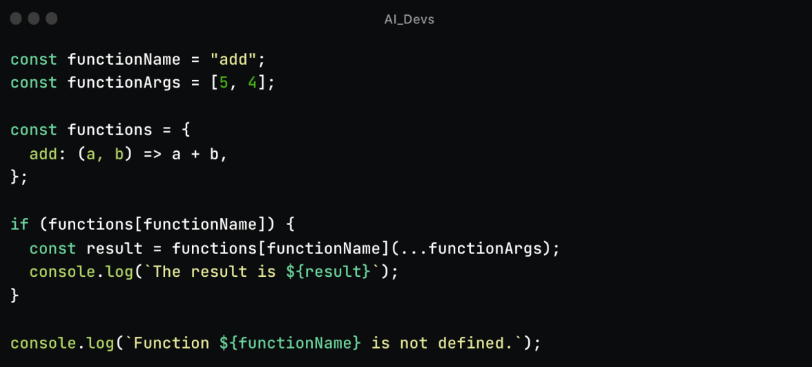